In [1]:
import functions as f #self-defined functions in functions.py
import kwant
import tinyarray as tiny
import numpy as np 
from numpy import linalg as LA
from types import SimpleNamespace
import holoviews as hv
from holoviews import opts
from matplotlib import pyplot as plt
# hv.extension('matplotlib', logo=False) #BOKEH DOESNT SUPPORT LATEX IN LABELS
hv.extension('bokeh', logo=False)
import time

pauli=f.pauli
# spin_vector = [pauli.s0sx,pauli.s0sy,pauli.s0sz]
dims = dict(kx = 'k_x',ky = 'k_y', mu = 'µ', delta = 'Δ', t = 't', E='ε',mu_t = 'µ/t')

In [16]:
def magn_texture(position, radius, azi_winding, radi_winding):
    x,y = position
    theta = np.arctan2(x,y)
    q = azi_winding
    p = radi_winding
    R = radius
    r = np.sqrt(x**2 + y**2)
    B = [np.sin(np.pi*p*(r/R))*np.cos(q*theta), np.sin(np.pi*p*(r/R))*np.sin(q*theta), np.cos(np.pi*p*(r/R))]
    return B

def onsite(site, radius, t, mu, j, azi_winding, radi_winding, delta): #define a function to determine the onsite energy term of the Hamiltonian
    position = site.pos #site is a class! Apart from real space position contains the type of atom (to which family it belongs, how many orbitals etc)
    B = magn_texture(position, radius, azi_winding, radi_winding) #calculate direction of magnetic field at position (x,y)
    skyrmion_interaction = j*(B[0]*pauli.s0sx + B[1]*pauli.s0sy + B[2]*pauli.s0sz)
    return 4*t*pauli.szs0 - mu*pauli.szs0 + delta*pauli.sxs0 + skyrmion_interaction
    
def hopping(position1,position2,t): #define the hopping terms in your system
    return -t*pauli.szs0

def build_disk(radius=10, plot=False):
    sys = kwant.Builder() #initialize your system
    sqlat = kwant.lattice.square(norbs=2)

    #define a Boolean function to shape your system
    def disk(position): 
        x,y = position
        return x**2 + y**2 < radius**2

    sys[sqlat.shape(disk,(0,0))]= onsite
    sys[sqlat.neighbors()]= hopping

    if plot:
        system_plot = kwant.plot(sys)
        
    return sys.finalized()

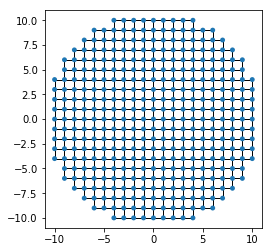

In [17]:
params = dict(radius=11, t=1, mu=0, j=0, delta=0, azi_winding=1, radi_winding=1)
sys = build_disk(radius = params['radius'], plot=True)

[-0.28895080277366236, 0.5779016055473247, 0.7632412252245553]

array([[[ 0.+0.j,  0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.-1.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.-0.j,  0.+0.j]],

       [[ 1.+0.j,  0.+1.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -1.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -0.+0.j]],

       [[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.-0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.-1.j,  0.+0.j]],

       [[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -0.+0.j],
        [ 1.+0.j,  0.+1.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -1.+0.j]]])